# Exploring the Data

In [1]:
import pandas as pd
df = pd.read_csv("train.csv")

print("Shape of the Dataset:",df.shape)

#the head method displays the first 5 rows of the data
df.head(5)

Shape of the Dataset: (1017209, 9)


C:\Users\Hp\AppData\Local\Temp\ipykernel_18312\1047460416.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [2]:
store = pd.read_csv("store.csv")
print("Shape of the Dataset:",store.shape)

#Display the first 5 rows of data using the head method of pandas dataframe
store.head(5)

Shape of the Dataset: (1115, 10)


Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

# Looking at the Data Dictionary

In [3]:
df_new = df.merge(store,on=["Store"], how="inner")
print(df_new.shape)

(1017209, 18)


In [4]:
print("Distinct number of Stores :", len(df_new["Store"].unique()))
print("Distinct number of Days :", len(df_new["Date"].unique()))
print("Average daily sales of all stores : ",round(df_new["Sales"].mean(),2))

Distinct number of Stores : 1115
Distinct number of Days : 942
Average daily sales of all stores :  5773.82


# Finding Data Types

In [5]:
df_new.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

# Working with Time

In [7]:
df_new["DayOfWeek"].value_counts()

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

In [8]:
#We can extract all date properties from a datetime datatype
import numpy as np
df_new['Date'] = pd.to_datetime(df_new['Date'], infer_datetime_format=True)
df_new["Month"] = df_new["Date"].dt.month
df_new["Quarter"] = df_new["Date"].dt.quarter
df_new["Year"] = df_new["Date"].dt.year
df_new["Day"] = df_new["Date"].dt.day
df_new["Week"] = df_new["Date"].dt.week
df_new["Season"] = np.where(df_new["Month"].isin([3,4,5]),"Spring",
 np.where(df_new["Month"].isin([6,7,8]),
"Summer",
 np.where(df_new["Month"].isin
([9,10,11]),"Fall",
 np.where(df_new["Month"].isin
([12,1,2]),"Winter","None"))))

#Using the head command to view (only) the data and the newly engineered features
print(df_new[["Date","Year","Month","Day","Week","Quarter",
"Season"]].head())

C:\Users\Hp\AppData\Local\Temp\ipykernel_18312\1694516765.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_new["Week"] = df_new["Date"].dt.week


        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


# Predicting Sales

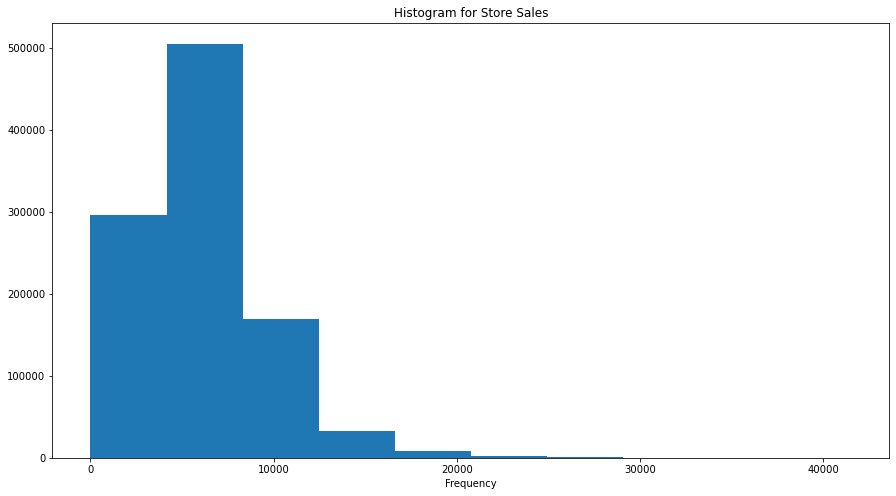

In [9]:
#Import matplotlib, python most popular data visualizing library
import matplotlib.pyplot as plt

#Create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(15,8))
plt.hist(df_new["Sales"])
plt.title("Histogram for Store Sales")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()

# Exploring Numeric Columns

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>],
       [<AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>],
       [<AxesSubplot:title={'center':'Promo2SinceWeek'}>,
        <AxesSubplot:title={'center':'Promo2SinceYear'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Quarter'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'Week'}>

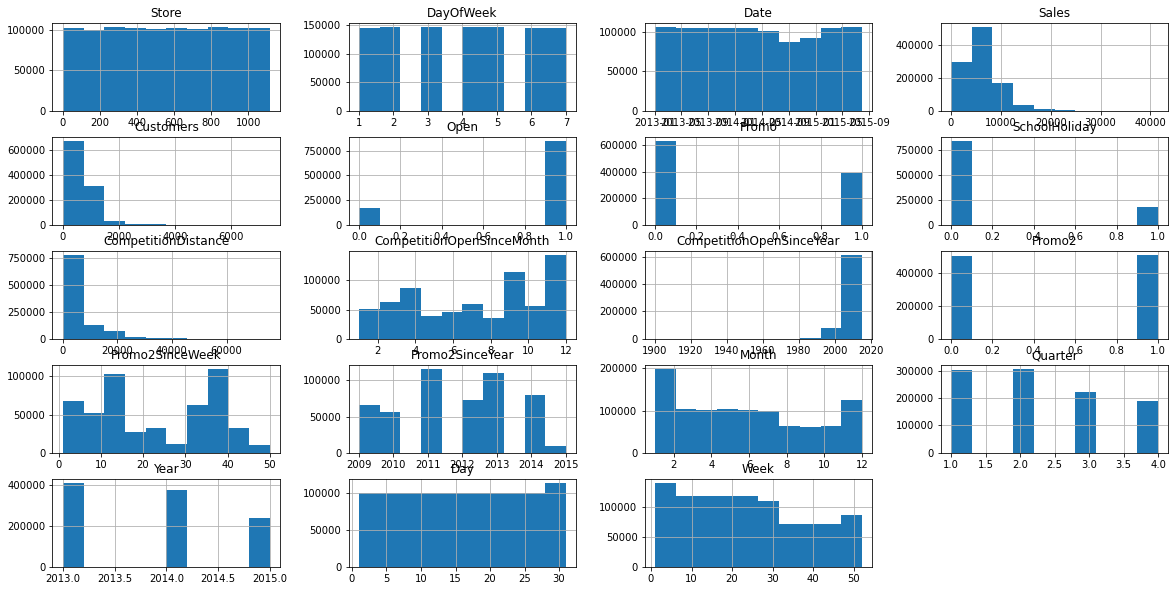

In [10]:
#Use the histogram function provided by the Pandas object
#The function returns a cross-tab histogram plot for all numeric columns in the data
df_new.hist(figsize=(20,10))

In [11]:
df_new.isnull().sum()/df_new.shape[0] * 100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [12]:
#Replace nulls with the mode
df_new["CompetitionDistance"]=df_new["CompetitionDistance"].fillna(df_new["CompetitionDistance"].mode()[0])

#Double check if we still see nulls for the column
df_new["CompetitionDistance"].isnull().sum()/df_new.shape[0] * 100

0.0

# Understanding the Categorical Features

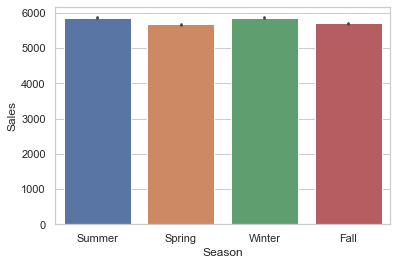

In [13]:
import seaborn as sns 

#Seaborn is another powerful visualization library for Python 
sns.set(style="whitegrid")

#Create the bar plot for Average Sales across different Seasons
ax = sns.barplot(x="Season", y="Sales", data=df_new)

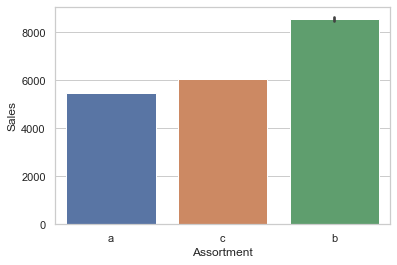

In [14]:
#Create the bar plot for Average Sales across different Assortments
ax = sns.barplot(x="Assortment", y="Sales", data=df_new)

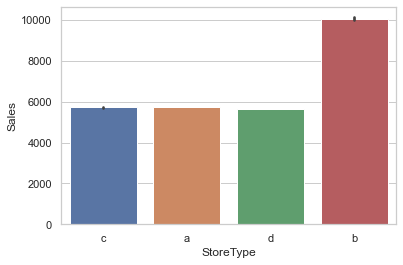

In [15]:
#Create the bar plot for Average Sales across different Store Types
ax = sns.barplot(x="StoreType", y="Sales", data=df_new)

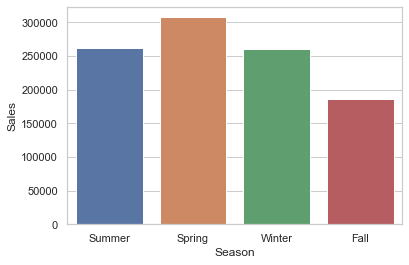

In [16]:
ax = sns.barplot(x="Season", y="Sales", data=df_new, estimator=np.size)

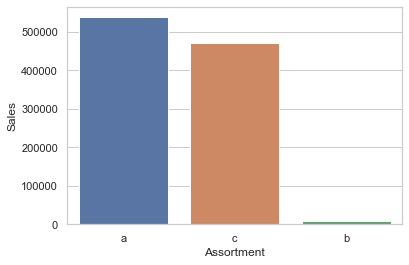

In [17]:
ax = sns.barplot(x="Assortment", y="Sales", data=df_new, estimator=np.size)

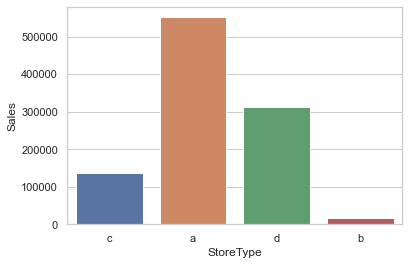

In [18]:
ax = sns.barplot(x="StoreType", y="Sales", data=df_new, estimator=np.size)

# Data Engineering

In [19]:
#Define a variable for each type of feature
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

target = ["Sales"]
numeric_columns = ["Customers","Open","Promo","Promo2", "StateHoliday","SchoolHoliday","CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year", "StoreType","Assortment","Season"]

#Define a function that will intake the raw dataframe and the column name and return a one hot encoded DF
def create_ohe(df, col):
 le = LabelEncoder()
 a=le.fit_transform(df_new[col]).reshape(-1,1)
 ohe = OneHotEncoder(sparse=False)
 column_names = [col+ "_"+ str(i) for i in le.classes_]
 return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

#Since the above function converts the column, one at a time
#We create a loop to create the final dataset with all features
temp = df_new[numeric_columns]
for column in categorical_columns:
 temp_df = create_ohe(df_new,column)
 temp = pd.concat([temp,temp_df],axis=1)

print("Shape of Data:",temp.shape)
print("Distinct Datatypes:",temp.dtypes.unique())

Shape of Data: (1017209, 44)
Distinct Datatypes: [dtype('int64') dtype('O') dtype('float64')]


In [20]:
print(temp.columns[temp.dtypes=="object"])

Index(['StateHoliday'], dtype='object')


In [21]:
temp["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [22]:
temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1)

#One last check of the data type
temp.dtypes.unique()

array([dtype('int64'), dtype('int32'), dtype('float64')], dtype=object)

In [23]:
from sklearn.model_selection import train_test_split

#Create train and test dataset with an 80:20 split
x_train, x_test, y_train, y_test = train_test_split(temp, df_new[target],test_size=0.2,random_state=2018)

#Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train,
y_train,test_size=0.1,random_state=2018)

#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (732390, 44)
Shape of x_val: (81377, 44)
Shape of x_test: (203442, 44)
Shape of y_train: (732390, 1)
Shape of y_val: (81377, 1)
Shape of y_test: (203442, 1)


# Defining Model Baseline Performance

In [24]:
#calculate the average score of the train dataset
mean_sales = y_train.mean()
print("Average Sales :",mean_sales)

Average Sales : Sales    5773.099997
dtype: float64


In [25]:
#Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(y_test - mean_sales).mean()[0])

MAE for Test Data: 2883.587604303215


# Designing the DNN

In [26]:
#Create Deep Neural Network Architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))

#The input_dim =44, since the width of the training data=44 (refer data engg section)
model.add(Dense(1,activation = "linear"))

#Configure the model
model.compile(optimizer='adam',loss="mean_absolute_error", metrics=["mean_absolute_error"])

#Train the model
model.fit(x_train.values,y_train.values, validation_data=(x_val,y_val),epochs=10,batch_size=64)

Epoch 1/10
11444/11444 [==============================] - 14s 1ms/step - loss: 957.5785 - mean_absolute_error: 957.5785 - val_loss: 839.1306 - val_mean_absolute_error: 839.1306
Epoch 2/10
11444/11444 [==============================] - 14s 1ms/step - loss: 781.8890 - mean_absolute_error: 781.8890 - val_loss: 752.9387 - val_mean_absolute_error: 752.9387
Epoch 3/10
11444/11444 [==============================] - 13s 1ms/step - loss: 738.5126 - mean_absolute_error: 738.5126 - val_loss: 732.9660 - val_mean_absolute_error: 732.9660
Epoch 4/10
11444/11444 [==============================] - 13s 1ms/step - loss: 720.6703 - mean_absolute_error: 720.6703 - val_loss: 701.9904 - val_mean_absolute_error: 701.9904
Epoch 5/10
11444/11444 [==============================] - 13s 1ms/step - loss: 711.3754 - mean_absolute_error: 711.3754 - val_loss: 702.5873 - val_mean_absolute_error: 702.5873
Epoch 6/10
11444/11444 [==============================] - 13s 1ms/step - loss: 704.4514 - mean_absolute_error: 704.

# Testing the Model Performance

In [27]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(x_test.values,y_test.values)

#Print the results
for i in range(len(model.metrics_names)):
 print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

6358/6358 [==============================] - 6s 866us/step - loss: 671.6541 - mean_absolute_error: 671.6541
Metric  loss : 671.65
Metric  mean_absolute_error : 671.65


# Improving the Model

In [28]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
history = model.fit(x_train,y_train, validation_data=(x_val, y_val),epochs=10,batch_size=64)

#result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
 print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/10
11444/11444 [==============================] - 19s 2ms/step - loss: 1725017.7500 - mean_absolute_error: 852.7829 - val_loss: 1193735.2500 - val_mean_absolute_error: 754.0322
Epoch 2/10
11444/11444 [==============================] - 19s 2ms/step - loss: 1162603.1250 - mean_absolute_error: 723.4090 - val_loss: 1061425.7500 - val_mean_absolute_error: 705.0641
Epoch 3/10
11444/11444 [==============================] - 19s 2ms/step - loss: 1087502.3750 - mean_absolute_error: 699.4980 - val_loss: 1043220.0000 - val_mean_absolute_error: 694.1129
Epoch 4/10
11444/11444 [==============================] - 19s 2ms/step - loss: 1051875.8750 - mean_absolute_error: 688.2719 - val_loss: 1071610.6250 - val_mean_absolute_error: 685.1992
Epoch 5/10
11444/11444 [==============================] - 19s 2ms/step - loss: 1025654.0000 - mean_absolute_error: 679.9048 - val_loss: 1032105.6250 - val_mean_absolute_error: 675.9222
Epoch 6/10
11444/11444 [==============================] - 19s 2ms/step - lo

In [29]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=15,batch_size=64)
result = model.evaluate(x_test,y_test)

for i in range(len(model.metrics_names)):
 print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/15
11444/11444 [==============================] - 25s 2ms/step - loss: 1716288.5000 - mean_absolute_error: 853.2347 - val_loss: 1106980.8750 - val_mean_absolute_error: 713.9826
Epoch 2/15
11444/11444 [==============================] - 24s 2ms/step - loss: 1176313.1250 - mean_absolute_error: 726.2844 - val_loss: 1119151.2500 - val_mean_absolute_error: 702.6756
Epoch 3/15
11444/11444 [==============================] - 25s 2ms/step - loss: 1100171.2500 - mean_absolute_error: 701.4827 - val_loss: 1132641.8750 - val_mean_absolute_error: 703.9847
Epoch 4/15
11444/11444 [==============================] - 24s 2ms/step - loss: 1066220.2500 - mean_absolute_error: 691.3315 - val_loss: 992946.5625 - val_mean_absolute_error: 678.7060
Epoch 5/15
11444/11444 [==============================] - 23s 2ms/step - loss: 1036986.7500 - mean_absolute_error: 682.6591 - val_loss: 975942.4375 - val_mean_absolute_error: 663.5359
Epoch 6/15
11444/11444 [==============================] - 25s 2ms/step - loss

# Increasing the Number of Neurons

In [30]:
model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=15,batch_size=64)
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
 print("Metric ",model.metrics_names[i],":", str(round(result[i],2)))

Epoch 1/15
11444/11444 [==============================] - 23s 2ms/step - loss: 1698922.5000 - mean_absolute_error: 848.9587 - val_loss: 1127729.2500 - val_mean_absolute_error: 716.7549
Epoch 2/15
11444/11444 [==============================] - 25s 2ms/step - loss: 1156867.3750 - mean_absolute_error: 726.1381 - val_loss: 1106946.1250 - val_mean_absolute_error: 725.3729
Epoch 3/15
11444/11444 [==============================] - 23s 2ms/step - loss: 1095280.3750 - mean_absolute_error: 704.9691 - val_loss: 1003848.1250 - val_mean_absolute_error: 681.0323
Epoch 4/15
11444/11444 [==============================] - 24s 2ms/step - loss: 1059428.1250 - mean_absolute_error: 692.2342 - val_loss: 1152958.6250 - val_mean_absolute_error: 725.4056
Epoch 5/15
11444/11444 [==============================] - 23s 2ms/step - loss: 1036111.0000 - mean_absolute_error: 683.0198 - val_loss: 1007902.6250 - val_mean_absolute_error: 681.1960
Epoch 6/15
11444/11444 [==============================] - 24s 2ms/step - lo

In [31]:
from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64,callbacks=[history])
result = model.evaluate(x_test,y_test)

for i in range(len(model.metrics_names)):
 print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/15
11444/11444 [==============================] - 48s 4ms/step - loss: 1659428.1250 - mean_absolute_error: 846.3630 - val_loss: 1366225.7500 - val_mean_absolute_error: 768.9311
Epoch 2/15
11444/11444 [==============================] - 48s 4ms/step - loss: 1167516.3750 - mean_absolute_error: 723.0126 - val_loss: 1127213.1250 - val_mean_absolute_error: 725.0233
Epoch 3/15
11444/11444 [==============================] - 47s 4ms/step - loss: 1100331.2500 - mean_absolute_error: 701.4292 - val_loss: 1272684.2500 - val_mean_absolute_error: 776.7422
Epoch 4/15
11444/11444 [==============================] - 46s 4ms/step - loss: 1069933.8750 - mean_absolute_error: 691.6281 - val_loss: 1027423.0625 - val_mean_absolute_error: 681.0842
Epoch 5/15
11444/11444 [==============================] - 45s 4ms/step - loss: 1041827.3125 - mean_absolute_error: 682.2977 - val_loss: 978752.2500 - val_mean_absolute_error: 664.4666
Epoch 6/15
11444/11444 [==============================] - 46s 4ms/step - los

# Plotting the Loss Metric Across Epochs

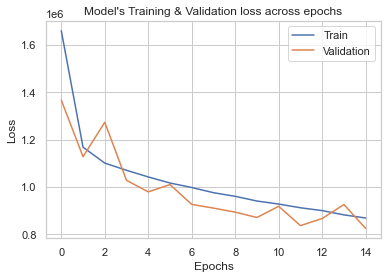

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Testing the Model Manually

In [33]:
#Manually predicting from the model, instead of using model'sevaluate function
y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Sales","Predicted Sales"]
print(y_test.head(10))

#Manually predicting from the model, instead of using model'sevaluate function
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :",mean_squared_error(y_test["Actual Sales"].values, y_test["Predicted Sales"].values))
print("MAE :",mean_absolute_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))

6358/6358 [==============================] - 11s 2ms/step
        Actual Sales  Predicted Sales
115563             0         1.431884
832654             0         1.431884
769112          2933      3112.072998
350588          8602      7470.460938
141556          6975      6531.668457
84435           9239      8908.113281
53018              0         1.431884
262419             0         1.431884
702267          5885      5797.985352
981431             0         1.431884
MSE : 825153.2187389003
MAE : 609.81584467
